# Template 
https://analyticsindiamag.com/hands-on-tutorial-on-quickda-for-data-analysis-and-cleaning/

- Author: Israel Oliveira [\[e-mail\]](mailto:'Israel%20Oliveira%20'<israel.oliveira@softplan.com.br>)

In [2]:
%load_ext watermark

In [13]:
import pandas as pd

from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *

In [14]:
# from tqdm import tqdm

# from glob import glob

# import matplotlib.pyplot as plt
# %matplotlib inline
# from IPython.core.pylabtools import figsize
# figsize(12, 8)

# import seaborn as sns
# sns.set_theme()

# pd.set_option("max_columns", None)
# pd.set_option("max_rows", None)
# pd.set_option('display.max_colwidth', None)

# from IPython.display import Markdown, display
# def md(arg):
#     display(Markdown(arg))

# from pandas_profiling import ProfileReport
# #report = ProfileReport(#DataFrame here#, minimal=True)
# #report.to

# import pyarrow.parquet as pq
# #df = pq.ParquetDataset(path_to_folder_with_parquets, filesystem=None).read_pandas().to_pandas()

# import json
# def open_file_json(path,mode='r',var=None):
#     if mode == 'w':
#         with open(path,'w') as f:
#             json.dump(var, f)
#     if mode == 'r':
#         with open(path,'r') as f:
#             return json.load(f)

# import functools
# import operator
# def flat(a):
#     return functools.reduce(operator.iconcat, a, [])

In [15]:
# Run this cell before close.
%watermark -d --iversion -b -r -g -m -v
!cat /proc/cpuinfo |grep 'model name'|head -n 1 |sed -e 's/model\ name/CPU/'
!free -h |cut -d'i' -f1  |grep -v total

Python implementation: CPython
Python version       : 3.8.10
IPython version      : 7.24.1

Compiler    : GCC 8.3.0
OS          : Linux
Release     : 5.11.0-7614-generic
Machine     : x86_64
Processor   : 
CPU cores   : 4
Architecture: 64bit

Git hash: 346931c9097044232349d6c6a04b7f43e5435312

Git repo: http://github.com/ysraell/examples

Git branch: master

json      : 2.0.9
ppscore   : 1.2.0
matplotlib: 3.4.2
pandas    : 1.2.4
ipywidgets: 7.6.3
sys       : 3.8.10 (default, May 12 2021, 15:46:43) 
[GCC 8.3.0]
numpy     : 1.19.5
quickda   : 0.2.2
seaborn   : 0.11.1
plotly    : 4.14.3

CPU	: Intel(R) Core(TM) i7-7500U CPU @ 2.70GHz
Mem:           15G
Swap:         4.0G


In [16]:
!find /work/examples/ |grep titanic

/work/examples/Libra/titanic.csv


In [17]:
df = pd.read_csv('/work/examples/Libra/titanic.csv')

In [18]:
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [19]:
explore(df)

,dtypes,count,null_sum,null_pct,nunique,min,25%,50%,75%,max,mean,median,std,skew
Age,float64,887,0,0.0,89,0.42,20.25,28.0,38.0,80.0,29.471443,28.0,14.121908,0.447189
Fare,float64,887,0,0.0,248,0.0,7.925,14.4542,31.1375,512.3292,32.30542,14.4542,49.78204,4.777671
Name,object,887,0,0.0,887,Capt. Edward Gifford Crosby,-,-,-,the Countess. of (Lucy Noel Martha Dyer-Edward...,-,-,-,-
Parents/Children Aboard,int64,887,0,0.0,7,0,0.0,0.0,0.0,6,0.383315,0.0,0.807466,2.741198
Pclass,int64,887,0,0.0,3,1,2.0,3.0,3.0,3,2.305524,3.0,0.836662,-0.623409
Sex,object,887,0,0.0,2,female,-,-,-,male,-,-,-,-
Siblings/Spouses Aboard,int64,887,0,0.0,7,0,0.0,0.0,1.0,8,0.525366,0.0,1.104669,3.68676
Survived,int64,887,0,0.0,2,0,0.0,0.0,1.0,1,0.385569,0.0,0.487004,0.470999


In [20]:
explore(df, method="profile", report_name="Design Report")

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
df_clean = clean(df)
df_clean

,survived,pclass,name,sex,age,siblings/spouses_aboard,parents/children_aboard,fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


Outlier Analysis - Boxplot


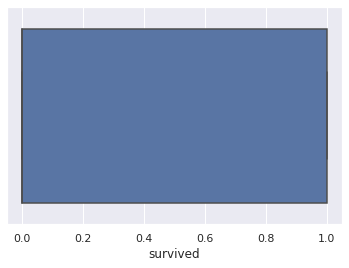

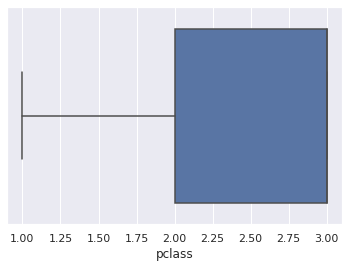

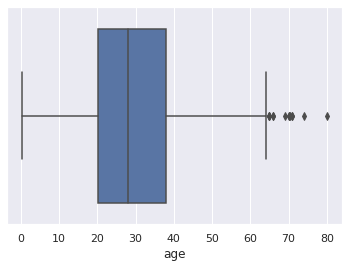

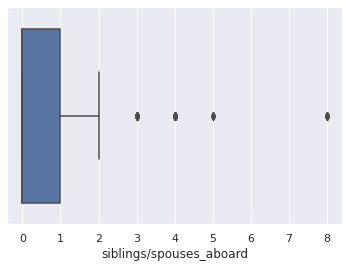

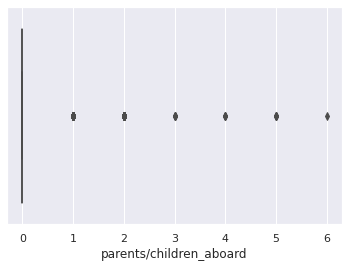

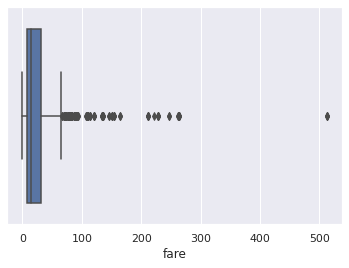

Distribution Analysis - Histogram


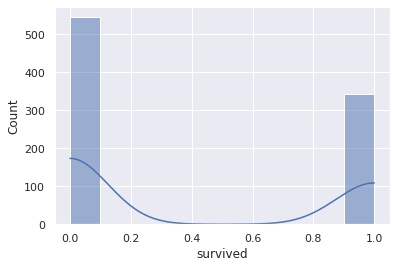

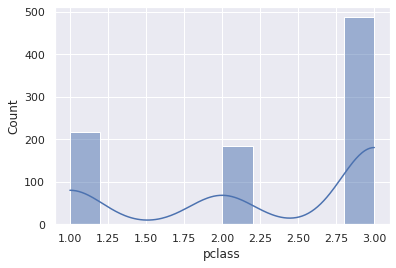

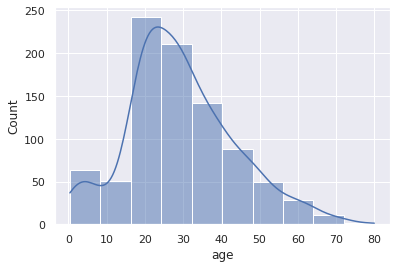

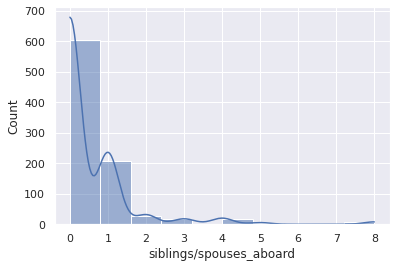

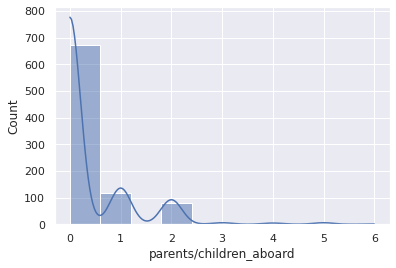

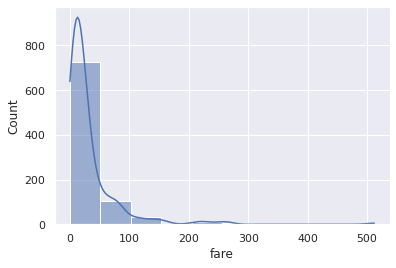

In [24]:
eda_num(df_clean)

In [25]:
eda_cat(df_clean, x='body-style', y='num-of-doors')

'body-style'


In [27]:
eda_numcat(df_clean, x='num-of-doors', y='city-mpg', method='comparison')

Violinplot of numerical feature city-mpg across categorical feature city-mpg
Could not interpret input 'num-of-doors'
